<figure>
  <IMG SRC="https://mamba-python.nl/images/logo_basis.png" WIDTH=150 ALIGN="right">
</figure>

# Reading and writing text files
*Developed by Onno Ebbens*

Reading and writing text files can be very useful. There are many ways to read and write files from all kinds of formats. In this notebook we will discuss reading and writing text files.

Table of content:
1. [reading text files](#1)
2. [advanced text file reading](#2)
3. [writing text files](#3)
4. [advanced text file writing](#4)
5. [final exercises](#5)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


## 1. reading text files <a class="anchor" id="1"></a>

There are several ways to read a text file. The most basic way is to use the function open(). This function opens a text file and returns a handle to that text file. If you use the open() function you need to specify whether you want to read ('r') or write ('w') to that text file. With the `readlines()` method we read the text file as a list of strings.

In [4]:
inh_nl_file = open(r'data\InhabitantsNL.txt', 'r')
inh_nl_lst = inh_nl_file.readlines()
inh_nl_file.close()
inh_nl_lst

['year\tinhabitants of the Netherlands (million)\n',
 '2006\t16.346\n',
 '2007\t16.358\n',
 '2008\t16.405\n',
 '2009\t16.485\n',
 '2010\t16.575\n',
 '2011\t16.656\n',
 '2012\t16.730\n',
 '2013\t16.780\n',
 '2014\t16.902\n',
 '2015\t16.934']

In the example above you `open` the file and after you've read the content you have to `close` it again. If we would not do this, the document will be opened continuously by python which can be the cause of some unsuspected errors.

A more pythonic way to do this is by using a `with`-statement to read the file. Using this statement will ensure everything after the `with`-statement, with the same indentation, will be executed and then the document is closed again.

In [5]:
#this code creates a handle to a textfile
with open(r'data\InhabitantsNL.txt', 'r') as inh_nl_file:
    inh_nl_lst = inh_nl_file.readlines()
inh_nl_lst

['year\tinhabitants of the Netherlands (million)\n',
 '2006\t16.346\n',
 '2007\t16.358\n',
 '2008\t16.405\n',
 '2009\t16.485\n',
 '2010\t16.575\n',
 '2011\t16.656\n',
 '2012\t16.730\n',
 '2013\t16.780\n',
 '2014\t16.902\n',
 '2015\t16.934']

#### **Exercise 1**
Open the 'InhabitantsNL.txt' with a textfile editor and compare your results with the list shown above. What is the `\t` and the `\n` in your `inh_nl_lst`?

There are several methods to read textfiles. One that is often used is the `readline()` method. This method reads one line at a time which can be usefull if you only want to read the top part of a big text file.

In [6]:
with open(r'data\InhabitantsNL.txt', 'r') as inh_nl_file:
    first_line  = inh_nl_file.readline()
    second_line = inh_nl_file.readline()  
print(first_line)
print(second_line)

year	inhabitants of the Netherlands (million)

2006	16.346



Now, if you want to do plot the data from the text file, you need to convert the text strings to something you can use in a plot. For example you can convert the text to `ints` and `floats` by using this:

In [7]:
#We want two lists with numbers that we can plot. 
#We can make these with a for loop.
year = []
inhab_nl = []
#We loop over the lines in the textfilelist (we skip the first line because it does not contain data)
for line in inh_nl_lst[1:]:
    #we know that the first 4 characters are the year, so we slice this and convert to an integer
    year.append(int(line[:4]))
    #we also know where we can find the number of inhabitants, so we slice and convert to a float
    inhab_nl.append(float(line[5:12]))

In [8]:
#now we have to lists
print(year)
print(inhab_nl)

[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
[16.346, 16.358, 16.405, 16.485, 16.575, 16.656, 16.73, 16.78, 16.902, 16.934]


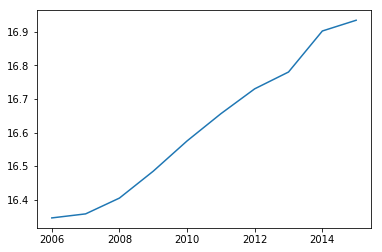

In [9]:
#and we can make a plot
ax = plt.plot(year,inhab_nl)

#### **Exercise 2** 
Plot the data from the file 'data\InhabitatnsBE.txt'

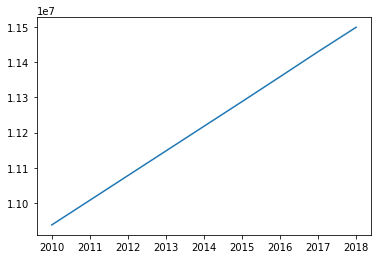

In [10]:
# Answer
with open(r'data\InhabitantsBE.txt', 'r') as inh_be_file:
    inh_be_lst = inh_be_file.readlines()

year_be = []
inhab_be = []
for line in inh_be_lst[2:]:
    year_be.append(int(line[:4]))
    inhab_be.append(float(line[5:14])) 

ax = plt.plot(year_be,inhab_be)    

## 2. Advanced textfile reading<a class="anchor" id="2"></a>

The example above shows the most basic way of reading files. With this functions you can read any file that contains text. For textfiles with a certain structure there are easier ways to read them. Below we show advanced reading options from the numpy and the pandas module.

In [11]:
#From the numpy module you can direcly read text as a numpy array
#you only need to specify how many rows you skip to see the data
#in this case you skip the first row because it only contains the column names
inh_nl_arr = np.loadtxt('data\InhabitantsNL.txt',skiprows=1)
print(inh_nl_arr)

[[2006.      16.346]
 [2007.      16.358]
 [2008.      16.405]
 [2009.      16.485]
 [2010.      16.575]
 [2011.      16.656]
 [2012.      16.73 ]
 [2013.      16.78 ]
 [2014.      16.902]
 [2015.      16.934]]


Now you can make a plot immediately without conversion

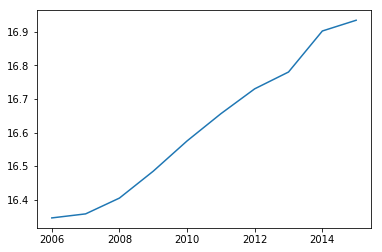

In [12]:
plt.plot(inh_nl_arr[:,0], inh_nl_arr[:,1])

#### **Exercise 3** 
Plot the data from the file 'data\InhabitatnsBE.txt' using `np.loadtxt()`

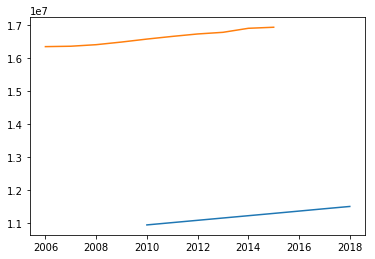

In [13]:
# Answer
inh_be_arr = np.loadtxt('data\InhabitantsBE.txt',skiprows=2)
plt.plot(inh_be_arr[:,0], inh_be_arr[:,1])
# bonus, plot together with the Netherlands
plt.plot(inh_nl_arr[:,0], inh_nl_arr[:,1]*1e6)

Still, we haven't fully optimized reading a textfile. We lost the information about the columns names when we read the data with np.loadtxt(). Wouldn't it be nice if we could use all the information in the textfile? 

Yes! That would be amazing:) With Pandas you can do exactly that! You can read files as a dataframe (for more information on dataframes see the Pandas notebook). The only thing you need to specify is the delimiter. In this case the numbers are delimited with a tab  `\t`

In [30]:
inh_nl_df = pd.read_csv('data\InhabitantsNL.txt', delimiter='\t')

In [19]:
#This is what a dataframe looks like
inh_nl_df

,year,inhabitants of the Netherlands (million)
0,2006,16.346
1,2007,16.358
2,2008,16.405
3,2009,16.485
4,2010,16.575
5,2011,16.656
6,2012,16.730
7,2013,16.780
8,2014,16.902
9,2015,16.934


#### **Exercise 4**  

What happens if you use plt.plot() on a Dataframe? What has happened? How can you make a plot? 

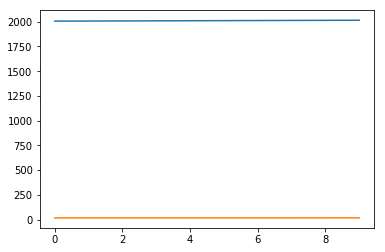

In [21]:
plt.plot(inh_nl_df)

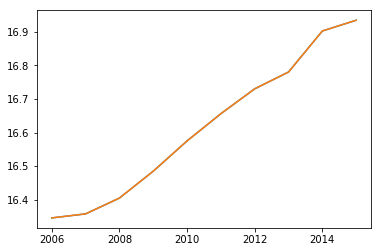

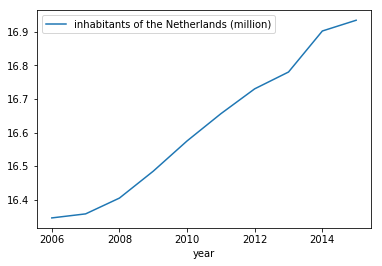

In [34]:
# Answer
inh_nl_df = pd.read_csv('data\InhabitantsNL.txt', delimiter='\t')

# basic
plt.plot(inh_nl_df['year'], inh_nl_df['inhabitants of the Netherlands (million)'])

# better
inh_nl_df.index = inh_nl_df['year']
plt.plot(inh_nl_df['inhabitants of the Netherlands (million)'])

# best
inh_nl_df = pd.read_csv('data\InhabitantsNL.txt', delimiter='\t', index_col=0)
inh_nl_df.plot()

## 3. writing text files<a class="anchor" id="3"></a>

Just like reading textfiles there is also a basic way to write textfiles.

In [35]:
with open(r"output\output.txt", "w") as txtfile:
    txtfile.write('hello world')

#### **Exercise 4**  
Write the information about inhabitants from the Netherlands (the one you read before) to a file named "output.txt"

## 4. Advanced textfile writing<a class="anchor" id="4"></a>

Off course you can use advanced writing functions if you want to save different data types

#### **Exercise 5** 
Write this numpy array to a textfile

In [10]:
arr = np.random.randint(0, 10, size=(10,10))

#### **Exercise 6**

Write the pandas dataframe below to a textfile

In [8]:
df = pd.DataFrame({'A':[1,2,3], 'B': ['tja', 3, 'fiets']})

## 5. final exercises<a class="anchor" id="5"></a>

#### **Exercise 7**

Write a function that can read a file similar to "InhabitantsNL.txt" and make a plot(). You can assume that the left column contains years and the right column contains data. Than the test the function for both the "InhabitantsNL.txt" and "InhabitantsBE.txt"

In [ ]:
#Answer
